# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка: 10.**

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
#!pip install folium

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [5]:
df = pd.read_csv("C:\\Users\\Ismail\\Desktop\\МО_1\\train.csv")
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
from datetime import datetime

df = df.drop("dropoff_datetime", axis=1)
df["pickup_datetime"] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

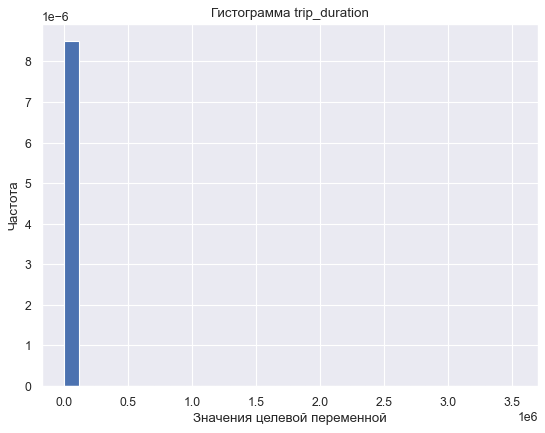

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df["trip_duration"], density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма trip_duration")
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

In [8]:
# Как видно из вышепредставленного графика выборочной функции плотности (гистограммы) целевой переменной trip_duration,
# в выборке имеются значительные по величине выбросы, которые не дают адекватно оценить распределение элементов в выборке.
# "Выбросами" данные значения являются только с точки зрения их величины, но не с точки зрения их важности!

# Наблюдается большой разрыв между медианным и максимальным значением в выборке, что предполагает проведение некоторой обработки 
# данных для удобной визуализации распределения основной массы значений целевой переменной:

print(f"""Медиана: {np.median(df["trip_duration"])}""")
print(f"""Максимум: {np.max(df["trip_duration"])}""")

Медиана: 662.0
Максимум: 3526282


In [9]:
# Небольшое количество экспериментов дало понять, что основная масса данных находится по крайней мере в пределах от 0 до 5к:

print(f"""Кол-во данных меньше 5к: {sum(df["trip_duration"] < 5000)}""")
print(f"""Кол-во данных больше 5к: {sum(df["trip_duration"] > 5000)}""")

Кол-во данных меньше 5к: 1454870
Кол-во данных больше 5к: 3773


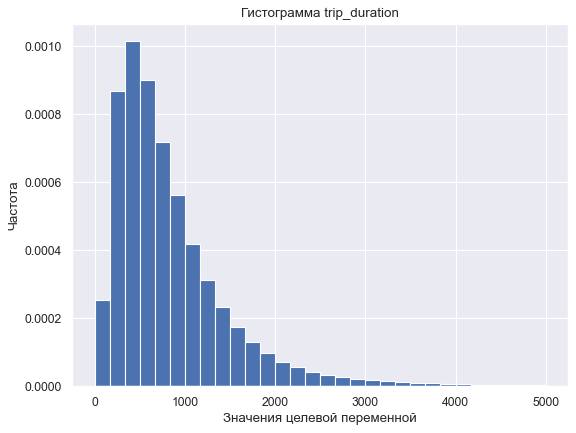

In [10]:
# Поэтому построим гистограмму распределения trip_duration без учета выбросов:

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df[df["trip_duration"] < 5000]["trip_duration"], density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма trip_duration")
plt.show()

In [11]:
# Распределение trip_duration напоминает экспоненциальное распределение, однако в отличие от последнего в начале наблюдается 
# небольшой рост плотности.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

In [12]:
# Основное отличие между RMSLE и RMSE - это операция взятия логарифма от целевой и предсказанной переменной, что значительно
# уменьшает величину реакции метрики на значительные выбросы. Другими словами, авторы выбрали RMSLE вместо RMSE для того, чтобы
# их модель обучалась в большей степени с учетом специфики основной массы данных и в меньшей степени учитывала выбросы.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} \to min$$<br>
$$\text{MSE}(X, \hat{y}_i, \hat{a}(x_i)) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2 \to min$$<br>
**При этом мы знаем, что:**<br>
$$\hat{y}_i = \log{(y_i + 1)}$$<br>
$$\hat{a}(x_i) = \log{(a(x_i) + 1)}$$<br>
**Получаем следующее:**<br>
$$\text{MSE}(X, \hat{y}_i, \hat{a}(x_i)) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2 \to min$$<br>
**C учетом того, что корень (монотонное положительное преобразование) не будет влиять на результат максимизации обоих выражений, оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$**

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [13]:
df["log_trip_duration"] = np.log1p(df["trip_duration"])
df = df.drop("trip_duration", axis=1)

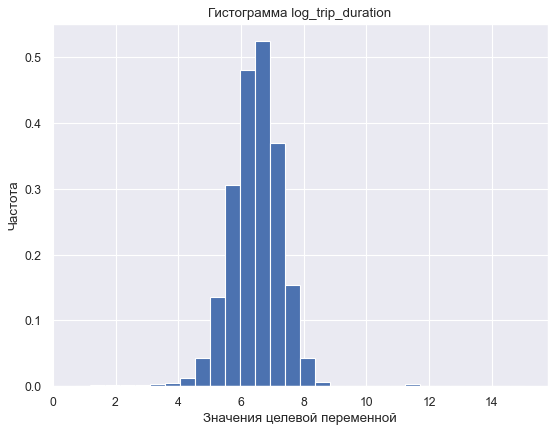

In [14]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df["log_trip_duration"], density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма log_trip_duration")
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [15]:
# Очевидно, что наилучшим константным предсказанием является среднее по выборке:

constant_prediction = np.mean(df["log_trip_duration"])
y = df["log_trip_duration"]
print(f"""MSE: {sum(np.square(y - constant_prediction))/len(y)}""")

MSE: 0.6332327625406583


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [16]:
# Добавим в датасет дополнительную переменную day_of_the_year, показывающую день года каждой начатой поездки:

df["day_of_the_year"] = df.apply(lambda row: row["pickup_datetime"].dayofyear, axis=1)

In [17]:
# Так как дней в году достаточно много, то удобнее будет изобразить зависимость количества поездок от дня в году в форме линии,
# а не в виде столбцов.
# Подготовим данные для визуализации:

day_of_the_year_count = df.groupby("day_of_the_year").size().reset_index(name="count")
day_of_the_year_count

,day_of_the_year,count
0,1,7162
1,2,6512
2,3,6353
3,4,6725
4,5,7204
...,...,...
177,178,7084
178,179,7311
179,180,7253
180,181,7623


<Figure size 1200x720 with 0 Axes>

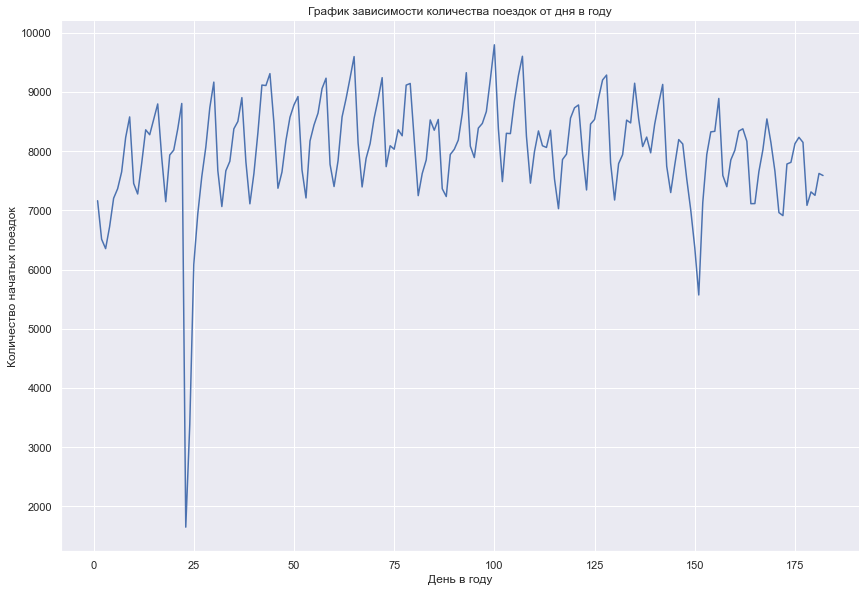

In [18]:
# Так как дней в году достаточно много, то удобнее будет изобразить зависимость количества поездок от дня в году в форме линии,
# а не в виде столбцов:

import seaborn as sns

plt.figure(figsize=(15, 9), dpi=80)
sns.relplot(data=day_of_the_year_count, x="day_of_the_year", y="count", kind="line", height=8, aspect=1.5)
plt.xlabel("День в году")
plt.ylabel("Количество начатых поездок")
plt.title("График зависимости количества поездок от дня в году")
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [19]:
# Посмотрим в какие дни года произошли сильные просадки по количеству начатых поездок:

df.groupby("day_of_the_year").size().sort_values()

day_of_the_year
23     1648
24     3383
151    5570
25     6084
3      6353
       ... 
44     9309
93     9325
65     9597
107    9602
100    9796
Length: 182, dtype: int64

In [20]:
# Как видно из вышепредставленных данных, 23-й (так же 24 и 25) и 151-й дни года оказались самыми неудачными с точки зрения количества поездок:

print(f"""First bad day: {df[df["day_of_the_year"] == 23]["pickup_datetime"].iloc[0].strftime('%Y-%m-%d')}""")
print(f"""Second bad day: {df[df["day_of_the_year"] == 151]["pickup_datetime"].iloc[0].strftime('%Y-%m-%d')}""")

First bad day: 2016-01-23
Second bad day: 2016-05-30


In [21]:
# 1-го января 2016-го года губернатор штата Нью-Йорк Эндрю Куомо запретил автомобильное движение в городе Нью-Йорк из-за снежной 
# бури "Джонас", которая накрыла мегаполис в субботу.
# 30-го мая 2016-го произошла серия нападений в четырех районах Нью-Йорка.

In [22]:
# Добавим в датасет дополнительные переменные day_name и day_hour, показывающие день недели и время в часах в течение дня каждой
# начатой поездки соответственно:

df["week_day"] = df.apply(lambda row: row["pickup_datetime"].day_name(), axis=1)
df["day_hour"] = df.apply(lambda row: row["pickup_datetime"].hour, axis=1)

In [23]:
# Подготовим данные для визуализации:

trip_count = df.groupby("week_day").size()

trips_weekday = [trip_count["Monday"],
                 trip_count["Tuesday"],
                 trip_count["Wednesday"],
                 trip_count["Thursday"],
                 trip_count["Friday"],
                 trip_count["Saturday"],
                 trip_count["Sunday"]]

week_days = ["Monday",
             "Tuesday",
             "Wednesday",
             "Thursday",
             "Friday",
             "Saturday",
             "Sunday"]

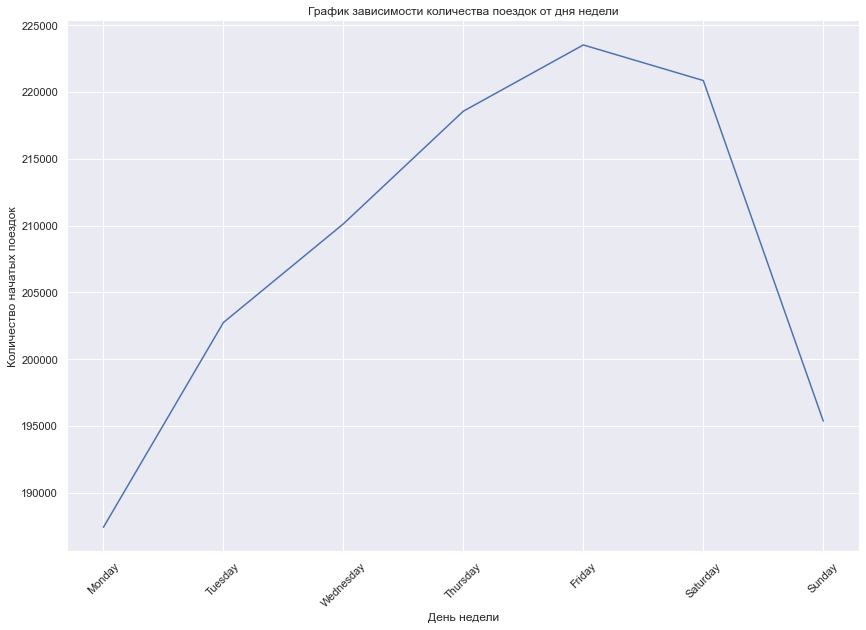

In [24]:
sns.relplot(x=week_days, y=trips_weekday, kind="line",
            height=8, aspect=1.5)
plt.xlabel("День недели")
plt.xticks(rotation=45)
plt.ylabel("Количество начатых поездок")
plt.title("График зависимости количества поездок от дня недели")
plt.show()

In [25]:
# Подготовим данные для визуализации:

df_hour = df.groupby("day_hour").size().reset_index(name="count")
df_hour

,day_hour,count
0,0,53248
1,1,38571
2,2,27972
3,3,20895
4,4,15792
5,5,15002
6,6,33248
7,7,55600
8,8,67053
9,9,67663


<Figure size 1200x720 with 0 Axes>

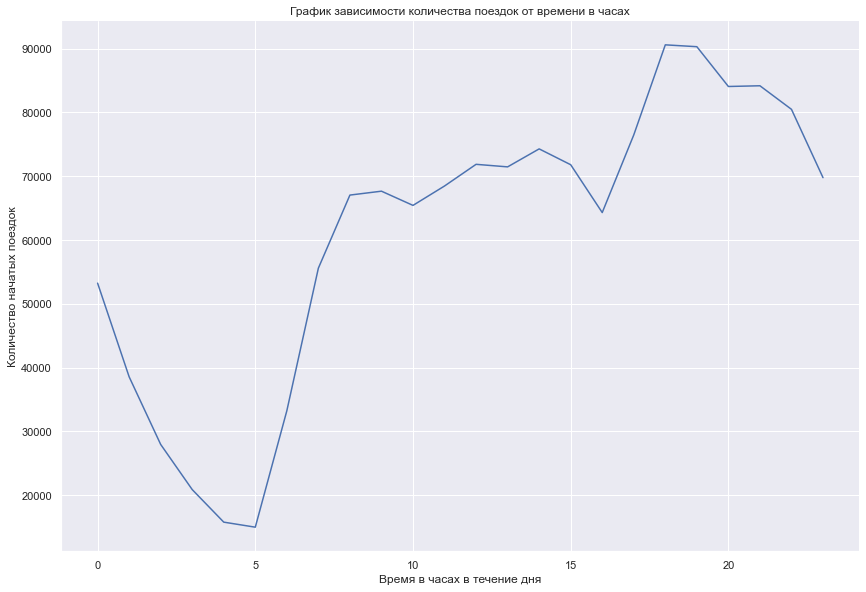

In [26]:
plt.figure(figsize=(15, 9), dpi=80)
sns.relplot(data=df_hour, x="day_hour", y="count", kind="line", height=8, aspect=1.5)
plt.xlabel("Время в часах в течение дня")
plt.ylabel("Количество начатых поездок")
plt.title("График зависимости количества поездок от времени в часах")
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [27]:
# Добавим в датасет дополнительную переменную month_name, показывающую название месяца в году каждой начатой поездки:

df["month_name"] = df.apply(lambda row: row["pickup_datetime"].month_name(), axis=1)

In [28]:
# Подготовим данные для визуализации:

df_hour_month = df.groupby(["day_hour", "month_name"]).size().reset_index(name="count")
df_hour_month

,day_hour,month_name,count
0,0,April,9185
1,0,February,8445
2,0,January,8330
3,0,June,9150
4,0,March,8992
...,...,...,...
139,23,February,11042
140,23,January,10241
141,23,June,11899
142,23,March,12172


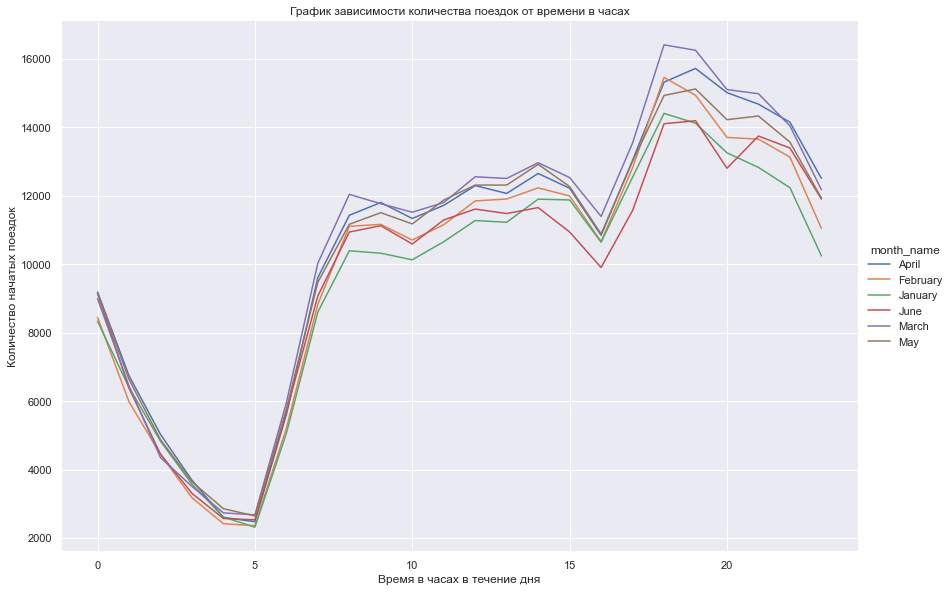

In [29]:
sns.relplot(data=df_hour_month, x="day_hour", y="count", kind="line", hue="month_name",
            height=8, aspect=1.5)
plt.xlabel("Время в часах в течение дня")
plt.ylabel("Количество начатых поездок")
plt.title("График зависимости количества поездок от времени в часах")
plt.show()

In [30]:
# Подготовим данные для визуализации:

df_hour_weekday = df.groupby(["day_hour", "week_day"]).size().reset_index(name="count")
df_hour_weekday

,day_hour,week_day,count
0,0,Friday,8779
1,0,Monday,4299
2,0,Saturday,11768
3,0,Sunday,12270
4,0,Thursday,6299
...,...,...,...
163,23,Saturday,13166
164,23,Sunday,6367
165,23,Thursday,11715
166,23,Tuesday,8656


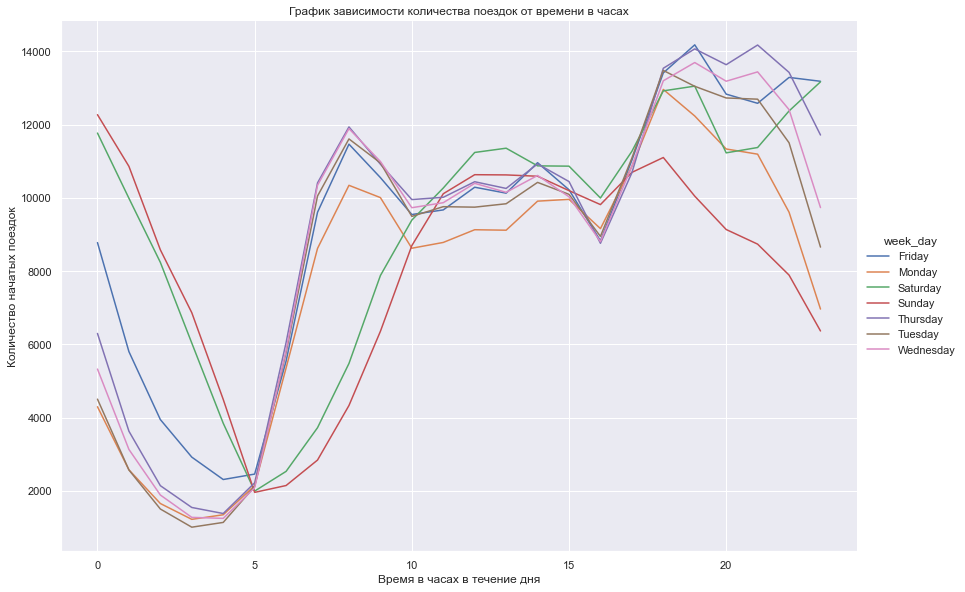

In [31]:
sns.relplot(data=df_hour_weekday, x="day_hour", y="count", kind="line", hue="week_day",
            height=8, aspect=1.5)
plt.xlabel("Время в часах в течение дня")
plt.ylabel("Количество начатых поездок")
plt.title("График зависимости количества поездок от времени в часах")
plt.show()

In [32]:
# Март оказался наиболее удачным месяцем с точки зрения количества начатых поездок в течении всего дня (люди активизируются весной).
# В ранние часы меньшего всего поездок наблюдается в январе, возможно, это связано с тем, что утром часто бывает темно.
# Во второй половине дня меньше всего поездок было совершено преимущественно в июне: жара могла этому поспособствовать.

# В будние дни наблюдается наибольшее количество начатых поездок утром примерно с 5:00 до 10:00 (люди едут на работу), 
# а ночью с 00:00 до 5:00 бОльшее количество поездок сорвешаются в выходные (люди отдыхают по ночам).

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop("log_trip_duration", axis=1)
y = df["log_trip_duration"]

# Разделим выборку на обучающую и тестовую:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# На всякие случаи перепишем индексы:
X_train = X_train.reset_index().drop("index", axis=1)
X_test = X_test.reset_index().drop("index", axis=1)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [34]:
# Подготовим данные для визуализации:

mean_logtrip_weekday = pd.concat([X_train, y_train], axis=1).groupby("week_day")["log_trip_duration"].mean()

logtrips_weekday = [mean_logtrip_weekday["Monday"],
                    mean_logtrip_weekday["Tuesday"],
                    mean_logtrip_weekday["Wednesday"],
                    mean_logtrip_weekday["Thursday"],
                    mean_logtrip_weekday["Friday"],
                    mean_logtrip_weekday["Saturday"],
                    mean_logtrip_weekday["Sunday"]]

<Figure size 1200x720 with 0 Axes>

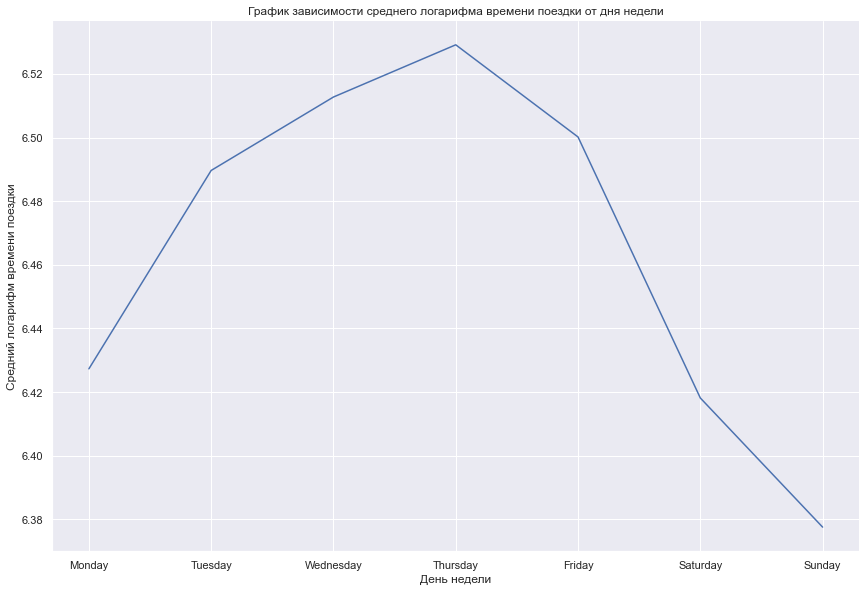

In [35]:
plt.figure(figsize=(15, 9), dpi=80)
sns.relplot(x=week_days, y=logtrips_weekday, kind="line", height=8, aspect=1.5)
plt.xlabel("День недели")
plt.ylabel("Cредний логарифм времени поездки")
plt.title("График зависимости среднего логарифма времени поездки от дня недели")
plt.show()

In [36]:
# Подготовим данные для визуализации:

df_logtrip_dayhour = pd.concat([X_train, y_train], axis=1).groupby("day_hour")["log_trip_duration"].mean().reset_index(name="mean")
df_logtrip_dayhour

,day_hour,mean
0,0,6.421890
1,1,6.371103
2,2,6.324450
3,3,6.314438
4,4,6.318426
5,5,6.233332
6,6,6.186998
7,7,6.350152
8,8,6.463914
9,9,6.481255


<Figure size 1200x720 with 0 Axes>

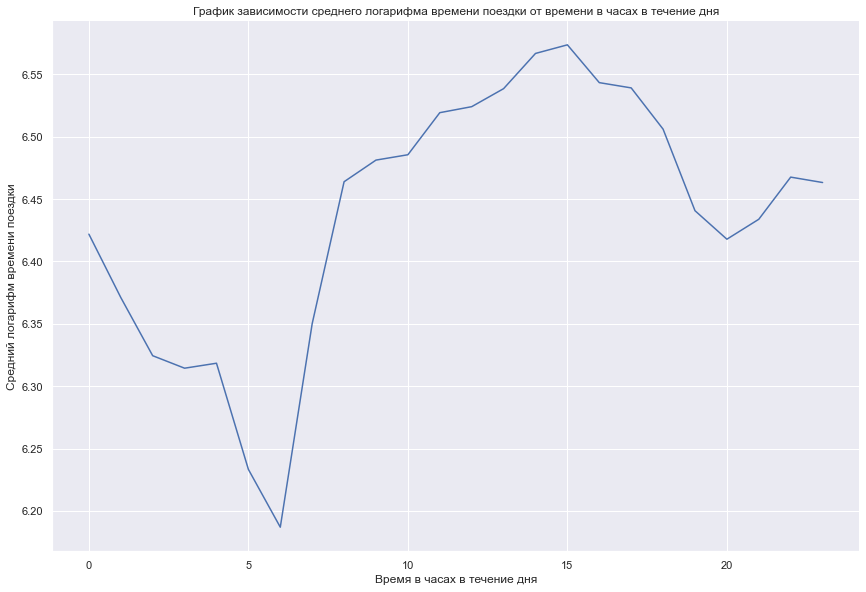

In [37]:
plt.figure(figsize=(15, 9), dpi=80)
sns.relplot(data=df_logtrip_dayhour, x="day_hour", y="mean", kind="line", height=8, aspect=1.5)
plt.xlabel("Время в часах в течение дня")
plt.ylabel("Cредний логарифм времени поездки")
plt.title("График зависимости среднего логарифма времени поездки от времени в часах в течение дня")
plt.show()

In [38]:
# Подготовим данные для визуализации:

df_logtrip_day_of_the_year = pd.concat([X_train, y_train], axis=1).groupby("day_of_the_year")["log_trip_duration"].mean().reset_index(name="mean")
df_logtrip_day_of_the_year

,day_of_the_year,mean
0,1,6.330319
1,2,6.320347
2,3,6.322156
3,4,6.314502
4,5,6.352638
...,...,...
177,178,6.459784
178,179,6.477398
179,180,6.500735
180,181,6.530312


<Figure size 1200x720 with 0 Axes>

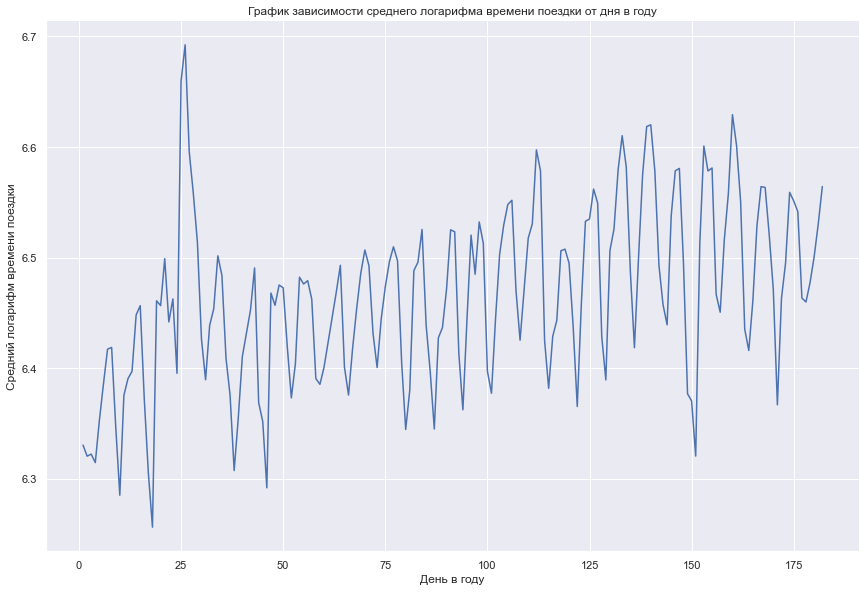

In [39]:
plt.figure(figsize=(15, 9), dpi=80)
sns.relplot(data=df_logtrip_day_of_the_year, x="day_of_the_year", y="mean", kind="line", height=8, aspect=1.5)
plt.xlabel("День в году")
plt.ylabel("Cредний логарифм времени поездки")
plt.title("График зависимости среднего логарифма времени поездки от дня в году")
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

In [40]:
# Графики зависимости таргета от дня недели и от часа в сутках похожи на аналогичные графики для количества поездок, потому что
# по сути к таргету было применено положительное монотонное преобразование в виде логарифмирования, что не очень сильно
# отражается на поведении функции.

# Что касается среднего таргета в аномальные периоды, то зимой в +- 25-ые числа января, средний логарифм времени поездки
# увеличился, что связано с сильной снежной бурей, из-за которой скорость движения автомобилей было частично ограничено и 
# замедлено. В конце мая среднее время поездки заметно снижается, так как из-за стрельбы в нескольких районах улицы города
# опустели, и машины могли двигаться быстро. 

# На графике зависимости log_trip_duration от номера дня в году можно заметить слабый возрастающий тренд с сезонным колебанием.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [41]:
# Большая часть признаков уже была добавлена, поэтому начнем с имплементации двух бинарных признаков.
# Отобразим первые десять дней в году с наименьшим количеством поездок, для более точного определения аномальных периодов:

df.groupby("day_of_the_year").size().sort_values().iloc[0:10]

day_of_the_year
23     1648
24     3383
151    5570
25     6084
3      6353
150    6372
2      6512
4      6725
172    6910
26     6941
dtype: int64

In [42]:
# Для первого аномального периода, связанного со снежной бурей выделим три дня: 23, 24 и 25-ые дни в году, а для второго
# аномального периода (стрельба на улицах) - 150-ый и 151-ый день в году:

X_train["is_blizzard"] = 0
X_test["is_blizzard"] = 0

X_train.loc[X_train["day_of_the_year"].isin([23, 24, 25]), "is_blizzard"] = 1
X_test.loc[X_test["day_of_the_year"].isin([23, 24, 25]), "is_blizzard"] = 1

X_train["is_shooting"] = 0
X_test["is_shooting"] = 0

X_train.loc[X_train["day_of_the_year"].isin([150, 151]), "is_shooting"] = 1
X_test.loc[X_test["day_of_the_year"].isin([150, 151]), "is_shooting"] = 1

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

In [43]:
# На самом деле все признаки (кроме бинарных) можно рассматривать как категориальные признаки, потому что они представляют
# из себя ограниченную выборку с заранее известными значениями и их порядком.
# В то же время признак day_of_the_year представлен достаточно обширной выборкой, которая может меняться в размере
# из-за високосных годов.
# Поэтому в принципе можно использовать day_of_the_year как численный признак.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [44]:
# Для начала обработаем категориальные признаки, а затем добавим их в датафреймы:

X_train["day_hour"] = X_train["day_hour"].astype(str)
X_test["day_hour"] = X_test["day_hour"].astype(str)

X_train = pd.concat([X_train, pd.get_dummies(X_train[["week_day", "day_hour", "month_name"]])], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test[["week_day", "day_hour", "month_name"]])], axis=1)

In [45]:
# Стандартизируем численные признаки и добавим их в датафреймы:

from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
scaler_test = StandardScaler()

train_scaled = scaler_train.fit_transform(X_train["day_of_the_year"].to_numpy().reshape(-1, 1))
test_scaled = scaler_test.fit_transform(X_test["day_of_the_year"].to_numpy().reshape(-1, 1))

X_train["scaled_day_of_the_year"] = train_scaled
X_test["scaled_day_of_the_year"] = test_scaled

In [46]:
# Заведем список признаков, которые не будут использоваться при обучении:

not_useable_features = ['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'day_of_the_year', 'week_day',
       'day_hour', 'month_name']

In [47]:
# Обучим Ridge-регрессию:

from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train.drop(not_useable_features, axis=1), y_train)

Ridge()

In [48]:
# Посчитаем перформанс модели на предсказанных данных:

from sklearn.metrics import mean_squared_error

y_predicted = clf.predict(X_test.drop(not_useable_features, axis=1))
print(f"""MSE score: {mean_squared_error(y_test, y_predicted)}""")

MSE score: 0.6198533036100298


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [49]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [50]:
# Зафиксируем random_state для каждой генерации выборки с целью воспроизведения результатов:

In [51]:
show_circles_on_map(df.sample(1000, random_state=0), "pickup_latitude", "pickup_longitude", "blue")

In [52]:
show_circles_on_map(df.sample(1000, random_state=1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

In [53]:
# На карте выделяются две точки: высадка рядом с Green Brook и посадка с рядом с New Brunswick.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [54]:
# Воспользуюсь кодом с первого семинара:

def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [55]:
X_train["haversine"] = haversine_array(X_train["pickup_latitude"], X_train["pickup_longitude"],
                                       X_train["dropoff_latitude"], X_train["dropoff_longitude"])
X_test["haversine"] = haversine_array(X_test["pickup_latitude"], X_test["pickup_longitude"],
                                       X_test["dropoff_latitude"], X_test["dropoff_longitude"])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [56]:
X_train["log_haversine"] = np.log1p(X_train["haversine"])
X_test["log_haversine"] = np.log1p(X_test["haversine"])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [57]:
from scipy.stats.stats import pearsonr 

print(f"""Correlation haversine-log_trip_duration on train: {pearsonr(X_train["haversine"], y_train)[0]}""")
print(f"""Correlation log_haversine-log_trip_duration on train: {pearsonr(X_train["log_haversine"], y_train)[0]}""")

print(f"""Correlation haversine-log_trip_duration on test: {pearsonr(X_test["haversine"], y_test)[0]}""")
print(f"""Correlation log_haversine-log_trip_duration on test: {pearsonr(X_test["log_haversine"], y_test)[0]}""")

Correlation haversine-log_trip_duration on train: 0.5655123462943554
Correlation log_haversine-log_trip_duration on train: 0.7498153903900339
Correlation haversine-log_trip_duration on test: 0.5937964413188419
Correlation log_haversine-log_trip_duration on test: 0.7500394056762837


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [58]:
X_train["average_speed"] = X_train["haversine"]/(np.exp(y_train) - 1)

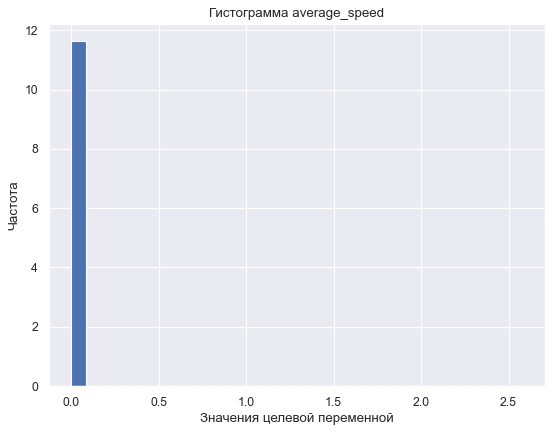

In [59]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(X_train["average_speed"], density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма average_speed")
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

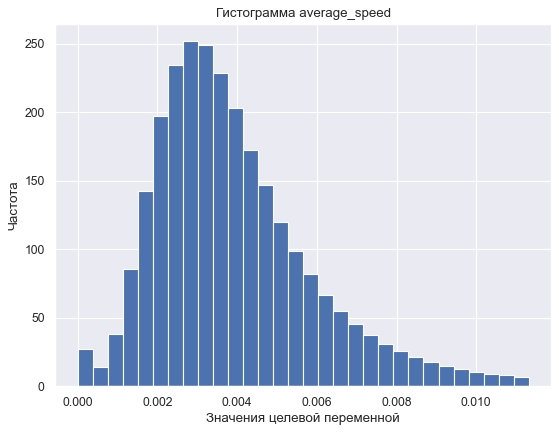

In [60]:
# Построим гистограмму средней скорости меньше квантиля 0.99:

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(X_train[X_train["average_speed"] <= X_train["average_speed"].quantile(q=0.99)]["average_speed"], density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма average_speed")
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [61]:
weekday_hour = X_train.groupby(["week_day", "day_hour"])["average_speed"].median()
weekday_hour = weekday_hour.unstack(level=0)
weekday_hour

week_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
day_hour,,,,,,,
0,0.004450,0.005648,0.003916,0.003973,0.004818,0.005211,0.004986
1,0.004829,0.005615,0.004317,0.004296,0.005272,0.005560,0.005415
10,0.002759,0.003030,0.004024,0.004475,0.002678,0.002616,0.002630
11,0.002738,0.003109,0.003696,0.004062,0.002606,0.002610,0.002528
12,0.002821,0.003080,0.003501,0.003837,0.002588,0.002611,0.002507
13,0.003047,0.003188,0.003381,0.003688,0.002720,0.002721,0.002622
14,0.002941,0.003157,0.003374,0.003637,0.002678,0.002752,0.002665
15,0.002878,0.003197,0.003347,0.003667,0.002725,0.002780,0.002673
16,0.003046,0.003328,0.003393,0.003663,0.002900,0.002965,0.002910


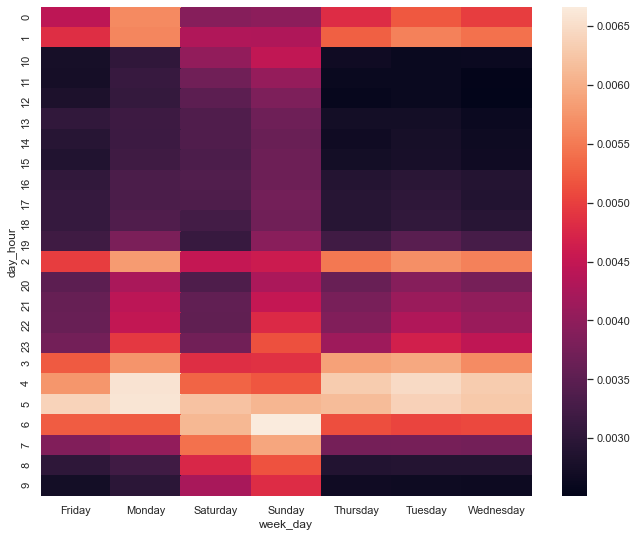

In [62]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(weekday_hour)
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [63]:
X_train = X_train.drop("average_speed", axis=1)

In [64]:
# Значение скорости было посчитано с использованием целевой переменной, поэтому ее нельзя использовать во время обучения.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [65]:
# Скорость максимальна преимущественно в понедельник, вторник, среду, четверг и пятницу в 4 и 5 утра, а также в воскресенье 
# и субботу в 5 и 6 утра.
# Скорость минимальна во вторник, среду, четверг и пятницу преимущественно утром, днем и ближе к вечеру (8:00-15:00)

In [66]:
X_train["is_traffic_jam"] = 0
X_test["is_traffic_jam"] = 0

X_train.loc[(X_train["week_day"].isin(["Tuesday", "Wednesday", "Thursday", "Friday"])) & 
        (X_train["day_hour"].isin(["8", "9", "10", "11", "12", "13", "14", "15"])), "is_traffic_jam"] = 1
X_test.loc[(X_test["week_day"].isin(["Tuesday", "Wednesday", "Thursday", "Friday"])) & 
        (X_test["day_hour"].isin(["8", "9", "10", "11", "12", "13", "14", "15"])), "is_traffic_jam"] = 1

X_train["is_free_road"] = 0
X_test["is_free_road"] = 0

X_train.loc[((X_train["week_day"].isin(["Monday","Tuesday", "Wednesday", "Thursday", "Friday"])) & 
        (X_train["day_hour"].isin(["4", "5"]))) | ((X_train["week_day"].isin(["Saturday", "Sunday"])) &
                                                  (X_train["day_hour"].isin(["5", "6"]))), "is_free_road"] = 1
X_test.loc[((X_test["week_day"].isin(["Monday","Tuesday", "Wednesday", "Thursday", "Friday"])) & 
        (X_test["day_hour"].isin(["4", "5"]))) | ((X_test["week_day"].isin(["Saturday", "Sunday"])) &
                                                  (X_test["day_hour"].isin(["5", "6"]))), "is_free_road"] = 1

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [67]:
# Найдем координаты посадки рядом с New Brunswick:

pickup_sample = df.sample(1000, random_state=0)
pickup = pickup_sample[pickup_sample["pickup_longitude"] == min(pickup_sample["pickup_longitude"])]
p_longitude = pickup["pickup_longitude"]
p_latitude = pickup["pickup_latitude"]

# Найдем координаты высадки рядом с Green Brook:

dropoff_sample = df.sample(1000, random_state=1000)
dropoff = dropoff_sample[dropoff_sample["dropoff_longitude"] == min(dropoff_sample["dropoff_longitude"])]
d_longitude = dropoff["dropoff_longitude"]
d_latitude = dropoff["dropoff_latitude"]

In [68]:
# Создаем два признака:

X_train["pickup_New_Brunswick"] = 0
X_test["pickup_New_Brunswick"] = 0

X_train.loc[(X_train["pickup_longitude"] == p_longitude.values[0]) & 
        (X_train["pickup_latitude"] == p_latitude.values[0]), "pickup_New_Brunswick"] = 1
X_test.loc[(X_test["pickup_longitude"] == p_longitude.values[0]) & 
        (X_test["pickup_latitude"] == p_latitude.values[0]), "pickup_New_Brunswick"] = 1

X_train["dropoff_Green_Brook"] = 0
X_test["dropoff_Green_Brook"] = 0

X_train.loc[(X_train["dropoff_longitude"] == p_longitude.values[0]) & 
        (X_train["dropoff_latitude"] == p_latitude.values[0]), "dropoff_Green_Brook"] = 1
X_test.loc[(X_test["dropoff_longitude"] == p_longitude.values[0]) & 
        (X_test["dropoff_latitude"] == p_latitude.values[0]), "dropoff_Green_Brook"] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

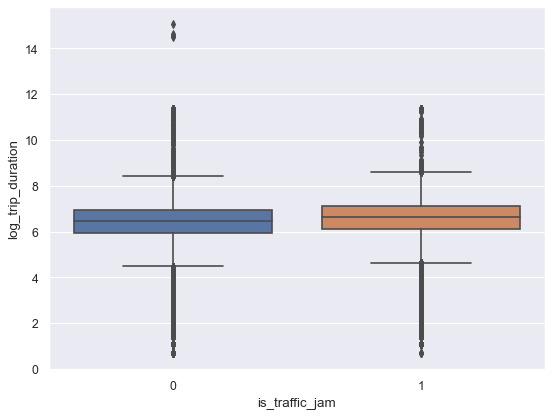

In [69]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(x=X_train["is_traffic_jam"], y=y_train)
plt.show()

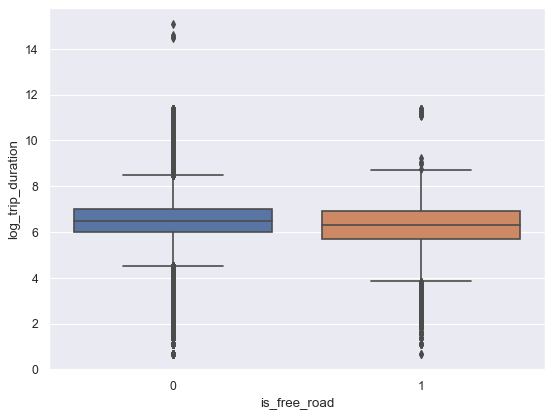

In [70]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(x=X_train["is_free_road"], y=y_train)
plt.show()

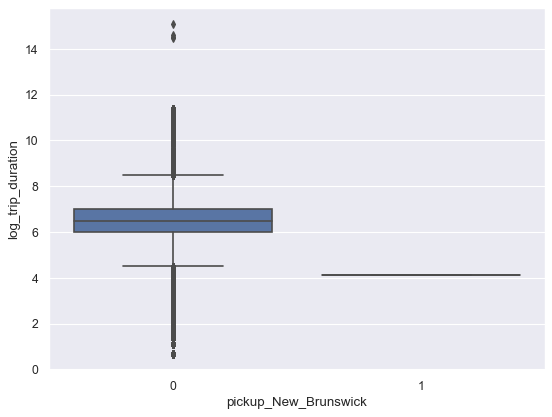

In [71]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(x=X_train["pickup_New_Brunswick"], y=y_train)
plt.show()

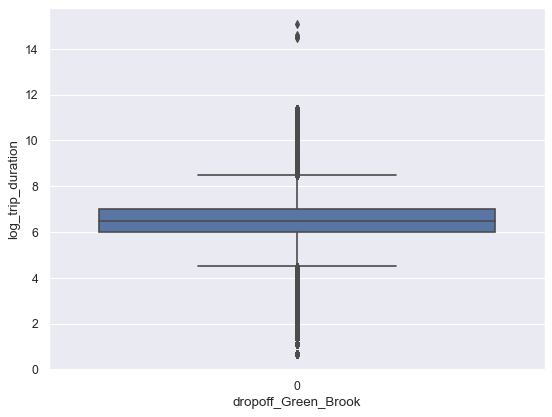

In [72]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(x=X_train["dropoff_Green_Brook"], y=y_train)
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

In [73]:
# Признаки, связанные с загруженностью дорог, получились неплохими, однако, что касается признаков отвечающих за две отдаленные
# точки от Манхэттена, то они получились не самыми репрезентативными: в каждом из боксплотов есть практический незаметный "бокс"
# показывающий распределение всего лишь одного объекта, а второй "бокс" содержит в себе всю остальную выборку. Другими словами,
# данные признаки практически константные признаки, состоящие из нулей за исключением всего лишь одного объекта, на котором они
# принимают единицу.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [74]:
#!pip install ipyleaflet

In [75]:
# Я использовал и немного модифицировал код на stackoverflow:
# https://ru.stackoverflow.com/questions/1161594/%D0%A0%D0%B0%D0%B7%D0%B1%D0%B8%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BE%D0%B1%D0%BB%D0%B0%D1%81%D1%82%D0%B8-%D0%BD%D0%B0-%D1%8F%D1%87%D0%B5%D0%B9%D0%BA%D0%B8-%D0%B8-%D0%BF%D1%80%D0%B8%D1%81%D0%B2%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BC%D0%B5%D1%82%D0%BE%D0%BA-%D1%81-%D0%BD%D0%B0%D1%87%D0%B0%D0%BB%D0%BE%D0%BC-%D0%B8-%D0%BA%D0%BE%D0%BD%D1%86%D0%BE%D0%BC

In [76]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.spatial.distance import cdist

COL_NAMES = dict(
    pick_lat="pickup_latitude",
    pick_lon="pickup_longitude",
    drop_lat="dropoff_latitude",
    drop_lon="dropoff_longitude"
)

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, loc, col, row, col_names=COL_NAMES):
        self.location_mh = loc
        self.col = col
        self.row = row
        self.col_names = col_names
        self.pick_lat = col_names["pick_lat"]
        self.pick_lon = col_names["pick_lon"]
        self.drop_lat = col_names["drop_lat"]
        self.drop_lon = col_names["drop_lon"]
        self.lat_min, self.lat_max = loc[:, 0].min(), loc[:, 0].max()
        self.lon_min, self.lon_max = loc[:, 1].min(), loc[:, 1].max()

    def _fit(self):
        self.walls = [(self.location_mh[:, 0].max() - self.location_mh[:, 0].min()) / self.col, \
              (self.location_mh[:, 1].max() - self.location_mh[:, 1].min()) / self.row]

        self.circles_loc = np.array([(((self.location_mh[:, 0].min() + i * (self.walls[0] / 2))), \
                               (self.location_mh[:, 1].min() + j * (self.walls[1] / 2)) ) \
                            for i in range(1, (self.col) * 2, 2) for j in range(1, (self.row) * 2, 2)])

    def get_sector_idx(self, X):
        self._fit()
        pickup_idx = cdist(X.loc[:, [self.pick_lat, self.pick_lon]],
                           self.circles_loc).argmin(axis=1)
        dropoff_idx = cdist(X.loc[:, [self.drop_lat, self.drop_lon]],
                            self.circles_loc).argmin(axis=1)
        qry = f"@self.lat_min <= {self.pick_lat} <= @self.lat_max \
               and @self.lon_min <= {self.pick_lon} <= @self.lon_max"
        pickup_valid = X.eval(qry).to_numpy()
        pickup_idx[~pickup_valid] = -1
        qry = f"@self.lat_min <= {self.drop_lat} <= @self.lat_max \
               and @self.lon_min <= {self.drop_lon} <= @self.lon_max"
        dropoff_valid = X.eval(qry).to_numpy()
        dropoff_idx[~dropoff_valid] = -1
        self.pickup_idx = pickup_idx
        self.dropoff_idx = dropoff_idx

    def transform(self, X):
        self.get_sector_idx(X)
        return pd.concat([pd.DataFrame(self.pickup_idx, columns=["pickup_idx"]),
           pd.DataFrame(self.dropoff_idx, columns=["dropoff_idx"])], axis=1)

In [77]:
# Координаты прямоугольника вокруг Манхэттена:

Manhattan = np.array([
              [40.703314, -74.018608],
              [40.703314, -73.934241],
              [40.791438, -73.934241],
              [40.791438, -74.018608]
               ])

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [78]:
# Добавим новые признаки, связанные с номером ячейки выезда/приезда:

transformer = MapGridTransformer(Manhattan, 4, 3)

train_coordinates = X_train[["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]]
test_coordinates = X_test[["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]]

train_features = transformer.transform(train_coordinates)
test_features = transformer.transform(test_coordinates)

X_train["pickup_idx"] = train_features["pickup_idx"].astype(str)
X_test["pickup_idx"] = test_features["pickup_idx"].astype(str)

X_train["dropoff_idx"] = train_features["dropoff_idx"].astype(str)
X_test["dropoff_idx"] = test_features["dropoff_idx"].astype(str)

In [79]:
# Закодируем категориальные признаки, имеющиеся на данный момент, и добавим их в выборки:

X_train = pd.concat([X_train, pd.get_dummies(X_train[["pickup_idx", "dropoff_idx"]])], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test[["pickup_idx", "dropoff_idx"]])], axis=1)

In [80]:
# Стандартизируем численные признаки и добавим их в датафреймы:

from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
scaler_test = StandardScaler()

train_scaled = scaler_train.fit_transform(X_train["log_haversine"].to_numpy().reshape(-1, 1))
test_scaled = scaler_test.fit_transform(X_test["log_haversine"].to_numpy().reshape(-1, 1))

X_train["scaled_log_haversine"] = train_scaled
X_test["scaled_log_haversine"] = test_scaled

In [ ]:
# Так как мы будем использовать scaled_log_haversine, то haversine и log_haversine уже не должны использоваться при обучении
# модели, поэтому добавим эти признаки в список неиспользуемых фичей:

not_useable_features.append("haversine")
not_useable_features.append("log_haversine")

In [81]:
# Обучим Ridge-регрессию:

from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train.drop(not_useable_features, axis=1), y_train)

Ridge()

In [82]:
# Посчитаем перформанс модели на предсказанных данных:

from sklearn.metrics import mean_squared_error

y_predicted = clf.predict(X_test.drop(not_useable_features, axis=1))
print(f"""MSE score: {mean_squared_error(y_test, y_predicted)}""")

MSE score: 0.22275129303477065


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [83]:
# venor_id и passenger_count могли бы быть потенциально полезными для более точного определения времени поездки.
# Например, один из поставщиков может иметь автопарк со старыми и медленными автомобилями, а большое количество пассажиров
# замедляет скорость машины либо же отвлекают водителя (в любом случае это очень и очень маловероятные случаи)
# Что касается store_and_fwd_flag, то данный признак вероятнее всего будет достаточно слабым ибо не имеет какой-либо ясной
# интерпретации и прямой связи со временем поездки.

In [84]:
print(f"""Кол-во уникальных значений vendor_id: {len(df["vendor_id"].unique())}""")
print(f"""Кол-во уникальных значений passenger_count: {len(df["passenger_count"].unique())}""")
print(f"""Кол-во уникальных значений store_and_fwd_flag: {len(df["store_and_fwd_flag"].unique())}""")

Кол-во уникальных значений vendor_id: 2
Кол-во уникальных значений passenger_count: 10
Кол-во уникальных значений store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

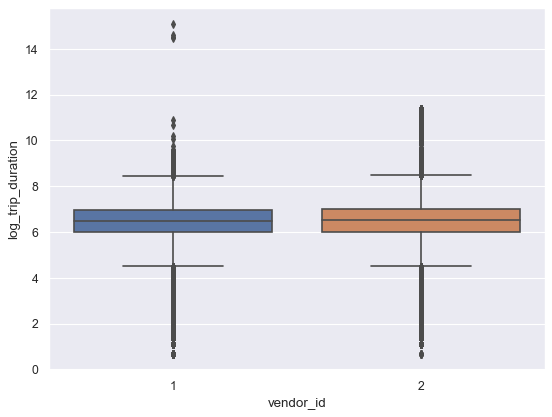

In [85]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data=df, x="vendor_id", y="log_trip_duration")
plt.show()

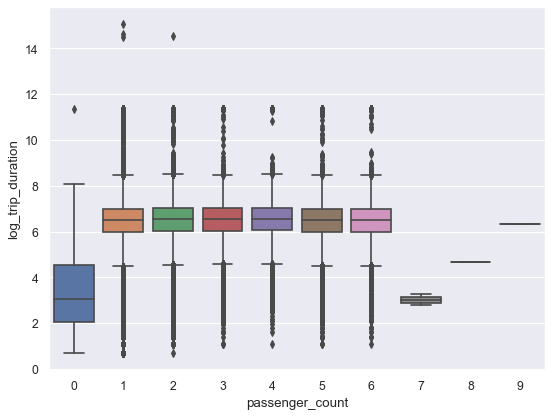

In [86]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data=df, x="passenger_count", y="log_trip_duration")
plt.show()

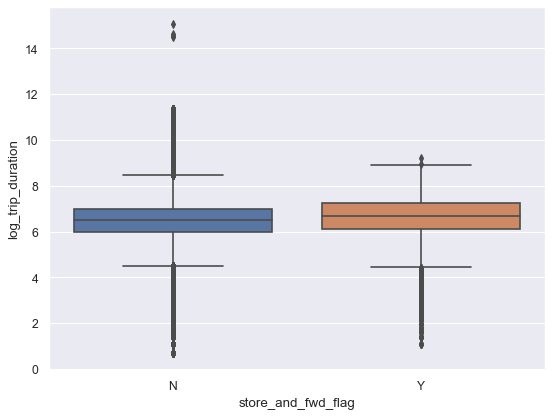

In [87]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data=df, x="store_and_fwd_flag", y="log_trip_duration")
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [88]:
X_train["vendor_id_new"] = 0
X_test["vendor_id_new"] = 0

X_train.loc[X_train["vendor_id"] == 2, "vendor_id_new"] = 1
X_test.loc[X_test["vendor_id"] == 2, "vendor_id_new"] = 1

X_train["store_and_fwd_flag_new"] = 0
X_test["store_and_fwd_flag_new"] = 0

X_train.loc[X_train["store_and_fwd_flag"] == "Y", "store_and_fwd_flag_new"] = 1
X_test.loc[X_test["store_and_fwd_flag"] == "Y", "store_and_fwd_flag_new"] = 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

In [89]:
# На самом деле, вряд ли эти признаки будут сильными, так как можно наблюдать достаточно большой дисбаланс объектов, очень
# много выбросов, и некоторые ящики очень малы в размерах.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [90]:
# Обучим Ridge-регрессию:

from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train.drop(not_useable_features, axis=1), y_train)

Ridge()

In [91]:
# Посчитаем перформанс модели на предсказанных данных:

from sklearn.metrics import mean_squared_error

y_predicted = clf.predict(X_test.drop(not_useable_features, axis=1))
print(f"""MSE score: {mean_squared_error(y_test, y_predicted)}""")

MSE score: 0.22263544921775877


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [92]:
X_train = X_train.drop(["vendor_id", "store_and_fwd_flag", "vendor_id_new", "store_and_fwd_flag_new", "passenger_count"], axis=1)
X_test = X_test.drop(["vendor_id", "store_and_fwd_flag", "vendor_id_new", "store_and_fwd_flag_new", "passenger_count"], axis=1)

In [99]:
# Cписок признаков, которые не будут использоваться при обучении сократился на 3:

not_useable_features = ['id', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'day_of_the_year', 'week_day',
       'day_hour', 'month_name']

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [100]:
# Для удобства обработки создадим датафрейм с признаками и целевой переменной:

df_train = X_train.copy()
df_train["trip_duration"] = np.exp(y_train) - 1

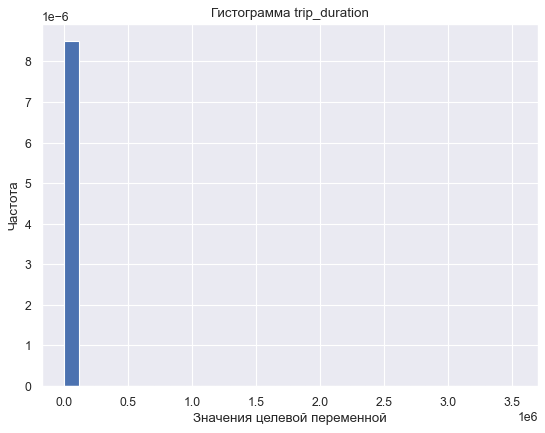

In [101]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df_train["trip_duration"], density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма trip_duration")
plt.show()

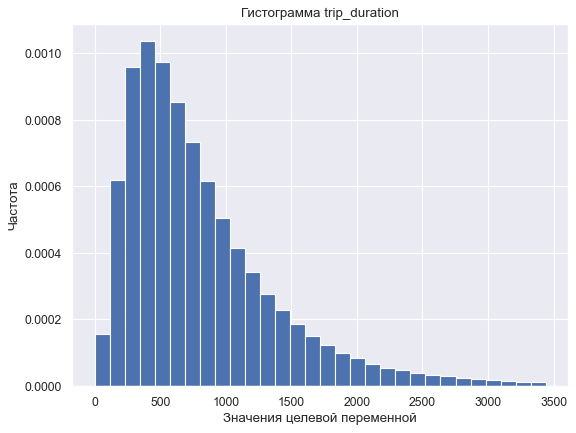

In [102]:
# Возьмем данные из выборки, которые меньше или равны 99% квантили:

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df_train[df_train["trip_duration"] <= df_train["trip_duration"].quantile(q=0.99)]["trip_duration"],
         density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма trip_duration")
plt.show()

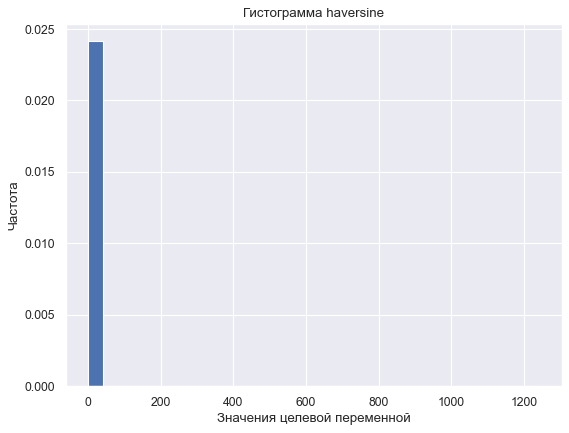

In [103]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df_train["haversine"], density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма haversine")
plt.show()

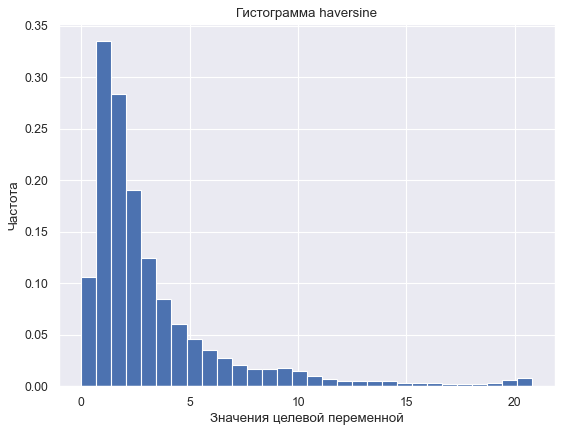

In [104]:
# Возьмем данные из выборки, которые меньше или равны 99% квантили:

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df_train[df_train["haversine"] <= df_train["haversine"].quantile(q=0.99)]["haversine"], density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма haversine")
plt.show()

In [105]:
# Обучим Ridge-регрессию на трэйнеи посчитаем residual sum of squares:

clf = Ridge()
clf.fit(X_train.drop(not_useable_features, axis=1), df_train["trip_duration"])
y_train_predicted = clf.predict(X_train.drop(not_useable_features, axis=1))

df_train["rss"] = np.square(df_train["trip_duration"] - y_train_predicted)

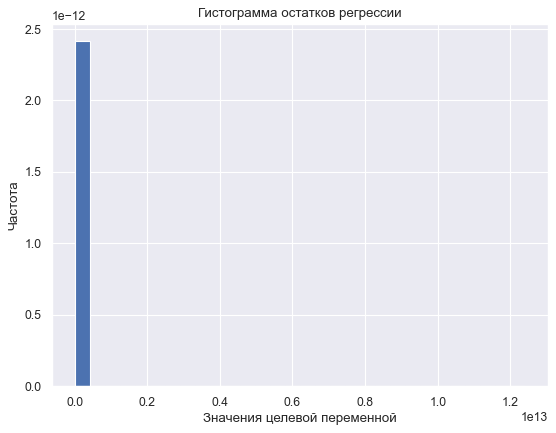

In [106]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df_train["rss"], density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма остатков регрессии")
plt.show()

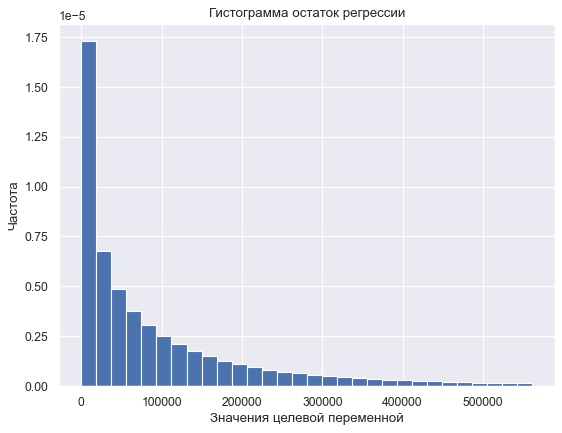

In [107]:
# Возьмем данные из выборки, которые меньше или равны 95% квантили:

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df_train[df_train["rss"] <= df_train["rss"].quantile(q=0.95)]["rss"],
         density=True, bins=30)
plt.xlabel("Значения целевой переменной")
plt.ylabel("Частота")
plt.title("Гистограмма остаток регрессии")
plt.show()

In [108]:
# Теперь мы знаем, где необходимо отсекать выбросы по каждой переменной:

df_train = df_train[(df_train["trip_duration"] <= df_train["trip_duration"].quantile(q=0.99)) | (df_train["haversine"] <= df_train["haversine"].quantile(q=0.99)) | (df_train["rss"] <= df_train["rss"].quantile(q=0.95))]

# Вернем обучающую выборку, очищенную от выбросов:
y_train = np.log1p(df_train["trip_duration"] + 1)
X_train = df_train.drop(["trip_duration", "rss"], axis=1)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [109]:
# Вручную проверим баланс значений в категориальных признаках:

In [110]:
X_train["month_name"].value_counts()

March       179311
April       175434
May         173164
February    166907
June        163546
January     160714
Name: month_name, dtype: int64

In [111]:
X_train["week_day"].value_counts()

Friday       156436
Saturday     154729
Thursday     152383
Wednesday    146687
Tuesday      141483
Sunday       136357
Monday       131001
Name: week_day, dtype: int64

In [112]:
X_train["day_hour"].value_counts()

19    63278
18    63066
21    58920
20    58768
22    56243
17    53343
14    51882
12    50448
15    50165
13    49924
23    48846
11    47944
9     47172
8     46869
10    45536
16    44829
7     38776
0     37371
1     27131
6     23044
2     19479
3     14565
4     11083
5     10394
Name: day_hour, dtype: int64

In [113]:
X_train["pickup_idx"].value_counts()

7     274703
3     132637
4     113785
-1    112185
11     90297
10     83897
0      77804
6      75442
8      29925
1      21661
2       4273
5       1291
9       1176
Name: pickup_idx, dtype: int64

In [114]:
X_train["dropoff_idx"].value_counts()

7     248454
-1    162449
3     110540
4     103248
11     92958
10     82712
0      74144
6      73647
8      32696
1      23045
2       9056
5       4523
9       1604
Name: dropoff_idx, dtype: int64

In [115]:
# Наиболее редкие категории заметны в признаках "pickup_idx" и "dropoff_idx", например редко кто уезжает или приезжает в 
# зоны 2, 5 и 9. Поэтому объединим их в одну зону:

X_train.loc[X_train["pickup_idx"].isin(["2", "5", "9"]), "pickup_idx"] = 2
X_test.loc[X_test["pickup_idx"].isin(["2", "5", "9"]), "pickup_idx"] = 2

X_train.loc[X_train["dropoff_idx"].isin(["2", "5", "9"]), "dropoff_idx"] = 2
X_test.loc[X_test["dropoff_idx"].isin(["2", "5", "9"]), "dropoff_idx"] = 2

In [116]:
# Дропнем старые признаки, а вместо них внедрим два новых:

X_train = X_train.drop(["pickup_idx_2", "pickup_idx_5", "pickup_idx_9", "dropoff_idx_2", "dropoff_idx_5", "dropoff_idx_9"],
                       axis=1)
X_test = X_test.drop(["pickup_idx_2", "pickup_idx_5", "pickup_idx_9", "dropoff_idx_2", "dropoff_idx_5", "dropoff_idx_9"], axis=1)

X_train["pickup_idx_2"] = 0
X_test["pickup_idx_2"] = 0

X_train.loc[X_train["pickup_idx"] == 2, "pickup_idx_2"] = 1
X_test.loc[X_test["pickup_idx"] == 2, "pickup_idx_2"] = 1

X_train["dropoff_idx_2"] = 0
X_test["dropoff_idx_2"] = 0

X_train.loc[X_train["dropoff_idx"] == 2, "dropoff_idx_2"] = 1
X_test.loc[X_test["dropoff_idx"] == 2, "dropoff_idx_2"] = 1

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [117]:
# Обучим Ridge-регрессию:

from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train.drop(not_useable_features, axis=1), y_train)

Ridge()

In [118]:
# Посчитаем перформанс модели на предсказанных данных:

from sklearn.metrics import mean_squared_error

y_predicted = clf.predict(X_test.drop(not_useable_features, axis=1))
print(f"""MSE score: {mean_squared_error(y_test, y_predicted)}""")

MSE score: 0.22274396497053728


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте количество признаков до и после кодирования категориальных признаков.

In [130]:
# Если не включать переменную "id", в датасете всего 5 категориальных признаков:

X_train.select_dtypes(include=object)

,id,week_day,day_hour,month_name,pickup_idx,dropoff_idx
0,id2365163,Sunday,0,March,3,1
1,id3126187,Friday,20,March,4,10
2,id2588127,Friday,18,April,7,-1
3,id0915715,Thursday,14,March,10,7
4,id3758776,Thursday,13,April,7,7
...,...,...,...,...,...,...
1021045,id2763967,Thursday,5,May,6,6
1021046,id0853058,Saturday,19,January,3,3
1021047,id2242904,Monday,20,March,11,11
1021048,id2558617,Saturday,9,April,-1,-1


In [133]:
# Так же имеется 6 бинарных признаков: "is_blizzard", "is_shooting", "is_traffic_jam", "is_free_road", "pickup_New_Brunswick",
# "dropoff_Green_Brook".

# Кроме того, в датасете есть 7 численных признаков: "pickup_datetime", "pickup_longitude", "pickup_latitude",
# "dropoff_longitude", "dropoff_latitude", "scaled_day_of_the_year", "scaled_log_haversine"

# В общей сложности получается 18 используемых признаков в датасете.

In [138]:
# Посчитаем кол-во категориальных признаков после кодирования механически через цикл:

categorical_num = 0

for column in ["week_day", "day_hour", "month_name", "pickup_idx", "dropoff_idx"]:
    categorical_num += len(X_train[column].unique())

print(f"""Кол-во категориальных признаков после кодирования: {categorical_num}""")

Кол-во категориальных признаков после кодирования: 59


In [140]:
# Получается следующее кол-во признаков после кодирования категориальных: 6 + 7 + 59 - 5 = 67

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [141]:
# Обучим Lasso-регрессию:

from sklearn.linear_model import Lasso

clf = Lasso()
clf.fit(X_train.drop(not_useable_features, axis=1), y_train)

Lasso()

In [142]:
# Посчитаем перформанс модели на предсказанных данных:

from sklearn.metrics import mean_squared_error

y_predicted = clf.predict(X_test.drop(not_useable_features, axis=1))
print(f"""MSE score: {mean_squared_error(y_test, y_predicted)}""")

MSE score: 0.481152100149581


In [143]:
# Как видно Ridge-регрессия оказалась лучше.

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [144]:
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [177]:
MSE_results_ridge = []

for alpha in np.logspace(-2, 0, 10):
    clf = Ridge(alpha=alpha)
    clf.fit(X_train_2.drop(not_useable_features, axis=1), y_train_2)
    y_predicted = clf.predict(X_val.drop(not_useable_features, axis=1))
    MSE_results_ridge.append((mean_squared_error(y_val, y_predicted), alpha))

MSE_results_ridge.sort()
optimal_alpha = MSE_results_ridge[0][1]

clf = Ridge(alpha=optimal_alpha)
clf.fit(X_train.drop(not_useable_features, axis=1), y_train)

y_predicted = clf.predict(X_test.drop(not_useable_features, axis=1))
print(f"""MSE score for optimal Ridge-regression: {mean_squared_error(y_test, y_predicted)}""")

MSE score: 0.22274396497053728


In [178]:
MSE_results_lasso = []
alphas = []
zero_weights_num = []

for alpha in np.logspace(-2, 0, 10):
    clf = Lasso(alpha=alpha)
    clf.fit(X_train_2.drop(not_useable_features, axis=1), y_train_2)
    y_predicted = clf.predict(X_val.drop(not_useable_features, axis=1))
    MSE_results_lasso.append((mean_squared_error(y_val, y_predicted), alpha))
    alphas.append(alpha)
    zero_weights_num.append(len(clf.coef_) - np.count_nonzero(clf.coef_))

MSE_results_lasso.sort()
optimal_alpha = MSE_results_lasso[0][1]

clf = Lasso(alpha=optimal_alpha)
clf.fit(X_train.drop(not_useable_features, axis=1), y_train)

y_predicted = clf.predict(X_test.drop(not_useable_features, axis=1))
print(f"""MSE score for optimal Lasso-regression: {mean_squared_error(y_test, y_predicted)}""")

MSE score: 0.24487410387531988


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

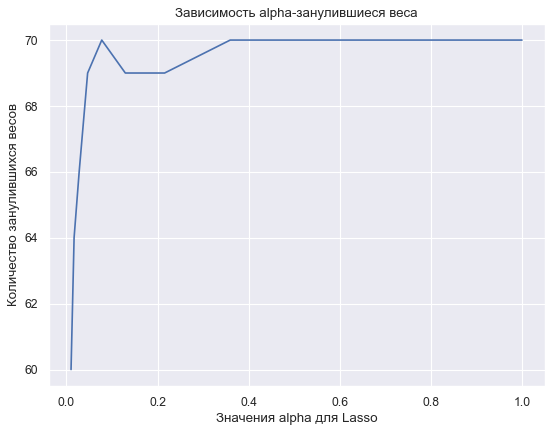

In [183]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(alphas, zero_weights_num)
plt.xlabel("Значения alpha для Lasso")
plt.ylabel("Количество занулившихся весов")
plt.title("Зависимость alpha-занулившиеся веса")
plt.show()

In [184]:
# Как видно из вышепредставленного график, уже при достаточно небольших значениях alpha большая часть весов занулилась, поэтому,
# скажем при alpha=0.01 (оптимальный коэффициент для нашего случая) MSE поднимается до отметки 0.245, что на 0.022 выше
# MSE=0.223, полученной при использовании последней оптимальной модели Ridge-регрессии. Относительные потери не очень большие.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [238]:
# Такой признак потенциально полезен, так как обычно у определенных зон города существует среднее время перемещния между ними,
# которое обусловлено большим количеством причин. Модель, обучаясь отдельно на признаках "из какой ячейки началась поездка" и 
# "в какой ячейке закончилась поездка", никак не удерживает в памяти взаимосвязь того, что начало и конец поездки связаны между
# собой. Модель будет знать, что машина стартовала из точки A, но она не будет знать, куда она приедет, точно так же модель
# будет знать, что поездка закончилась в точке B, но она не знает откуда машина приехала. Другими словами, два эти признака
# существуют для модели, но никак не связаны. Поэтому добавление комбинированного признака, может помочь улучшить перформанс 
# модели.

In [229]:
# Создадим колонку "zone_pair", где будут внесены зоны перемещения такси в виде "zone1_to_zone2"

X_train["zone_pair"] = X_train.apply(lambda row: "_to_".join(map(str, [row["pickup_idx"], row["dropoff_idx"]])), axis=1)
X_test["zone_pair"] = X_test.apply(lambda row: "_to_".join(map(str, [row["pickup_idx"], row["dropoff_idx"]])), axis=1)

In [230]:
# Наиболее редким перемещениям присвоим метку "rare_movement"

X_train.loc[X_train["zone_pair"].isin(X_train["zone_pair"].value_counts().index[100:]), "zone_pair"] = "rare_movement"
X_test.loc[X_test["zone_pair"].isin(X_test["zone_pair"].value_counts().index[100:]), "zone_pair"] = "rare_movement"

In [231]:
# Закодируем "zone_pair":

X_train = pd.concat([X_train, pd.get_dummies(X_train[["zone_pair"]])], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test[["zone_pair"]])], axis=1)

In [233]:
# Теперь удалим признак, отвечающий за редкие перемещения:

X_train = X_train.drop("zone_pair_rare_movement", axis=1)
X_test = X_test.drop("zone_pair_rare_movement", axis=1)

In [235]:
# Так как "zone_pair" больше не пригодится, то удалим эту фичу:

X_train = X_train.drop("zone_pair", axis=1)
X_test = X_test.drop("zone_pair", axis=1)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [236]:
# Обучим Ridge-регрессию:

from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train.drop(not_useable_features, axis=1), y_train)

Ridge()

In [237]:
# Посчитаем перформанс модели на предсказанных данных:

from sklearn.metrics import mean_squared_error

y_predicted = clf.predict(X_test.drop(not_useable_features, axis=1))
print(f"""MSE score: {mean_squared_error(y_test, y_predicted)}""")

MSE score: 0.23252977928139634


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.